# BERT Base - Augmented Data - All Data

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!pip install -q tensorflow==2.8.0

import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 22.3 MB/s eta 0:00:00
2.8.0


In [ ]:
!pip install -q transformers==4.18.0

import transformers
print(transformers.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 56.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 99.4 MB/s eta 0:00:00
4.18.0


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba18 - Testing All Dataset

/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba18 - Testing All Dataset


In [ ]:
!ls

'augJoin - AllDataset - filtered.csv'
'augJoin - AllDataset - unfiltered.csv'
'BERT - All Dataset - base.ipynb'
'BERT - All Dataset - filtered.ipynb'
'BERT - All Dataset - unfiltered.ipynb'
'Copy of BiLSTM - GoEmotion - base.ipynb'
'Copy of BiLSTM - GoEmotion - filtered.ipynb'
'Copy of BiLSTM - GoEmotion - unfiltered.ipynb'
'Copy of LSTM - GoEmotion - base.ipynb'
'Copy of LSTM - GoEmotion - filtered.ipynb'
'Copy of LSTM - GoEmotion - unfiltered.ipynb'
 dataset.csv
'RoBERTa - All Dataset - base.ipynb'
'RoBERTa - All Dataset - filtered.ipynb'
'RoBERTa - All Dataset - unfiltered.ipynb'


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

dataset = pd.read_csv("augJoin - AllDataset - filtered.csv", index_col=0, encoding="utf-8")
dataset

,text,emotion
0,im not talking about a studio. im talking abou...,anger
1,. . . Wait a fucking second,anger
2,"Oh [NAME], someone did it already, and it was ...",surprise
3,see im on here having fun meming on all yall b...,joy
4,Yeah - thanks - I vaguely remember this. I won...,surprise
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,disgust
78006,Ohhh sorry. I got it now. Thanks bruv,joy
78007,"Don't listen to the idiot, we love your posts!",anger
78008,i can feel more emotional now,sadness


In [ ]:
dataset = dataset.rename({'Text':'text', 'Emotion': 'emotion'}, axis=1)  # new method

In [ ]:
dataset

,text,emotion
0,im not talking about a studio. im talking abou...,anger
1,. . . Wait a fucking second,anger
2,"Oh [NAME], someone did it already, and it was ...",surprise
3,see im on here having fun meming on all yall b...,joy
4,Yeah - thanks - I vaguely remember this. I won...,surprise
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,disgust
78006,Ohhh sorry. I got it now. Thanks bruv,joy
78007,"Don't listen to the idiot, we love your posts!",anger
78008,i can feel more emotional now,sadness


In [ ]:
dataset = dataset.dropna().reset_index(drop=True)

In [ ]:
dataset

,text,emotion
0,im not talking about a studio. im talking abou...,anger
1,. . . Wait a fucking second,anger
2,"Oh [NAME], someone did it already, and it was ...",surprise
3,see im on here having fun meming on all yall b...,joy
4,Yeah - thanks - I vaguely remember this. I won...,surprise
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,disgust
78006,Ohhh sorry. I got it now. Thanks bruv,joy
78007,"Don't listen to the idiot, we love your posts!",anger
78008,i can feel more emotional now,sadness


In [ ]:
dataset['emotion'].value_counts().sort_index()

anger       12987
disgust     10744
fear        13037
joy         14744
sadness     14168
surprise    12330
Name: emotion, dtype: int64

In [ ]:
dataset = dataset[dataset.emotion != 'love']

In [ ]:
dataset['emotion'].value_counts().sort_index()

anger       12987
disgust     10744
fear        13037
joy         14744
sadness     14168
surprise    12330
Name: emotion, dtype: int64

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['emotion_encode'] = le.fit_transform(dataset['emotion'])
dataset.head()

,text,emotion,emotion_encode
0,im not talking about a studio. im talking abou...,anger,0
1,. . . Wait a fucking second,anger,0
2,"Oh [NAME], someone did it already, and it was ...",surprise,5
3,see im on here having fun meming on all yall b...,joy,3
4,Yeah - thanks - I vaguely remember this. I won...,surprise,5


In [ ]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_mapping)

{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'sadness': 4, 'surprise': 5}


In [ ]:
LABEL_NAME = le.classes_
print(LABEL_NAME)

['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']


In [ ]:
emotion_col = dataset.pop("emotion")
emotion_col

0           anger
1           anger
2        surprise
3             joy
4        surprise
           ...   
78005     disgust
78006         joy
78007       anger
78008     sadness
78009    surprise
Name: emotion, Length: 78010, dtype: object

In [ ]:
dataset

,text,emotion_encode
0,im not talking about a studio. im talking abou...,0
1,. . . Wait a fucking second,0
2,"Oh [NAME], someone did it already, and it was ...",5
3,see im on here having fun meming on all yall b...,3
4,Yeah - thanks - I vaguely remember this. I won...,5
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,1
78006,Ohhh sorry. I got it now. Thanks bruv,3
78007,"Don't listen to the idiot, we love your posts!",0
78008,i can feel more emotional now,4


# Train, Test, Validation Data Splitting

In [ ]:
import numpy as np

train_data, val_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
train_data = train_data.reset_index().drop(['index'], axis=1)

In [ ]:
train_data['emotion_encode'].value_counts()

3    11833
4    11358
2    10415
0    10324
5     9903
1     8575
Name: emotion_encode, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data['emotion_encode'].value_counts()

3    1453
4    1407
2    1318
0    1285
5    1256
1    1082
Name: emotion_encode, dtype: int64

In [ ]:
val_data = val_data.reset_index().drop(['index'], axis=1)

In [ ]:
val_data['emotion_encode'].value_counts()

3    1458
4    1403
0    1378
2    1304
5    1171
1    1087
Name: emotion_encode, dtype: int64

In [ ]:
train_data.shape, test_data.shape, val_data.shape

((62408, 2), (7801, 2), (7801, 2))

# Model 

In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'roberta-base'

In [ ]:
from transformers import RobertaTokenizer

bert_tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

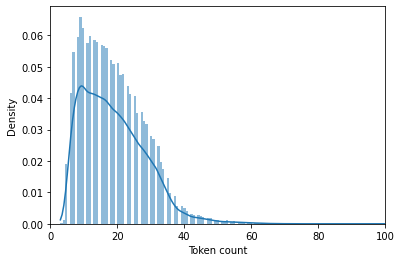

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in train_data.text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 80

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(train_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(val_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFRobertaForSequenceClassification

# Load model
bert_model = TFRobertaForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
1951/1951 [==============================] - 1049s 529ms/step - loss: 0.7080 - accuracy: 0.7542 - val_loss: 0.5571 - val_accuracy: 0.8086
Epoch 2/5
1951/1951 [==============================] - 1028s 527ms/step - loss: 0.5107 - accuracy: 0.8237 - val_loss: 0.5406 - val_accuracy: 0.8136
Epoch 3/5
1951/1951 [==============================] - 1028s 527ms/step - loss: 0.4486 - accuracy: 0.8435 - val_loss: 0.5381 - val_accuracy: 0.8168
Epoch 4/5
1951/1951 [==============================] - 1029s 527ms/step - loss: 0.3996 - accuracy: 0.8612 - val_loss: 0.5567 - val_accuracy: 0.8169
Epoch 5/5
1951/1951 [==============================] - 1029s 527ms/step - loss: 0.3584 - accuracy: 0.8751 - val_loss: 0.5914 - val_accuracy: 0.8130
CPU times: user 55min 17s, sys: 10min 56s, total: 1h 6min 14s
Wall time: 1h 26min 26s


In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

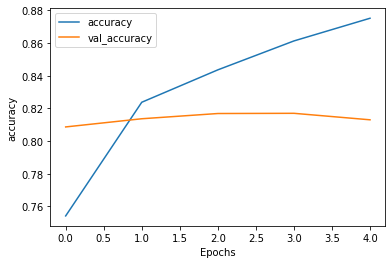

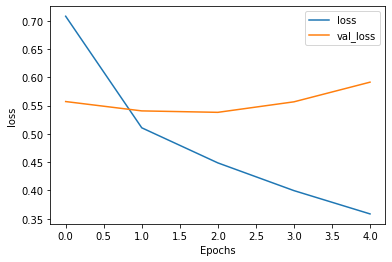

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.754182 	   0.707998 	   0.808614 	   0.557130
       2   0.823708 	   0.510697 	   0.813614 	   0.540608
       3   0.843530 	   0.448642 	   0.816818 	   0.538050
       4   0.861220 	   0.399614 	   0.816947 	   0.556650
       5   0.875096 	   0.358405 	   0.812973 	   0.591413


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

244/244 [==============================] - 42s 172ms/step - loss: 0.6080 - accuracy: 0.8098
Test Accuracy: 0.8097679615020752


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['emotion_encode'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8097679784642995

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 973,  167,   33,   24,   25,   63],
       [ 143,  751,   65,   24,   29,   70],
       [  35,   44, 1156,    9,   30,   44],
       [  41,   14,   15, 1269,   33,   81],
       [  91,   79,   51,   30, 1114,   42],
       [  45,   43,   51,   46,   17, 1054]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1285
           1       0.68      0.69      0.69      1082
           2       0.84      0.88      0.86      1318
           3       0.91      0.87      0.89      1453
           4       0.89      0.79      0.84      1407
           5       0.78      0.84      0.81      1256

    accuracy                           0.81      7801
   macro avg       0.81      0.81      0.80      7801
weighted avg       0.81      0.81      0.81      7801

